In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

In [2]:
data=pd.read_csv("../input/sales-forecasting/train.csv")
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


### İlk öncə sətr və sütun sayı ilə tanış oluruq

In [3]:
data.shape 

(9800, 18)

### Daha sonra isə null dəyərlər haqqında məlumat almaq lazımdır. Əgər nulla dəyərlər azdırsa onları atmaq və ya bərpa etmək lazımdır

In [4]:
data.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

### Datasetin sütunlarının data tiplərini öyrənmək lazımdır. Çünki data tipləri uyğun olmadıqda proseslər düzgün yerinə yetirilmir

In [5]:
data.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

### Buradan aydın olur ki "Order Date" və "Ship Date" sütunları date tipi olmaq yerinə object olaraq verilib. Buna görədə date tipinə çevirmək lazımdır

In [6]:
data["Order Date"] = pd.to_datetime(data["Order Date"], dayfirst = True).dt.date
data["Ship Date"]=pd.to_datetime(data["Ship Date"], dayfirst=True).dt.date

### İndi isə "Order Date" sütununu illərə və aylara görə sütunlara bölmək lazımdır. Satışın illərə və aylara görə miqdarını öyrənmək üçün önəmlidir

In [7]:
data["Year"]=pd.to_datetime(data["Order Date"]).dt.year
data["Month"]=pd.to_datetime(data["Order Date"]).dt.month

### İllərə görə toplam satış öyrənmək və onu anlaşılan vizual formaya salmaq lazımdır

In [8]:
data.groupby("Year")["Sales"].sum()

Year
2015    479856.2081
2016    459436.0054
2017    600192.5500
2018    722052.0192
Name: Sales, dtype: float64

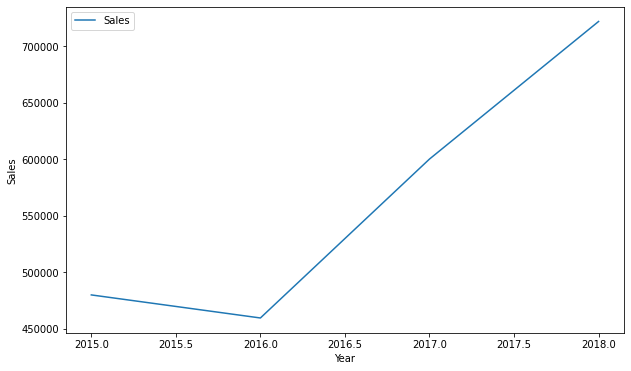

In [9]:
plt.figure(figsize=(10,6))
sns.lineplot(data=data.groupby("Year")["Sales"].sum(),label="Sales")
plt.xlabel="Year"
plt.ylabel="Sales"
plt.title=("İllərə Görə Satış Miqdarı")
plt.show()

### Aylara görə ortalama satış öyrənmək və onu anlaşılan vizual formaya salmaq lazımdır

In [10]:
data.groupby("Month")["Sales"].mean()

Month
1     257.627403
2     199.902745
3     290.549393
4     207.432269
5     212.533412
6     211.052856
7     208.802997
8     227.007110
9     221.642106
10    246.596162
11    241.657496
12    232.619515
Name: Sales, dtype: float64

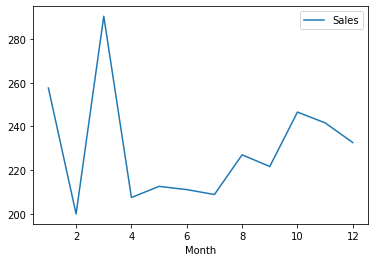

In [11]:
monthmean=data.groupby("Month")["Sales"].mean().reset_index()
datamonth=monthmean.set_index("Month")
sns.lineplot(data=datamonth)
plt.xlabel="Month"
plt.ylabel="Sales"
plt.title=("Aylara görə ortalama satış")
plt.show()

### İllərin ayrılıqda aylara görə satışını öyrənməkdə lazım ola bilər

In [12]:
data2015=data[data['Year']==2015]
data2016=data[data['Year']==2016]
data2017=data[data['Year']==2017]
data2018=data[data['Year']==2018]

### 2015 ci il üzrə aylıq satış

In [13]:
data2015.groupby('Month')['Sales'].sum()

Month
1     14205.7070
2      4519.8920
3     55205.7970
4     27906.8550
5     23644.3030
6     34322.9356
7     33781.5430
8     27117.5365
9     81623.5268
10    31453.3930
11    77907.6607
12    68167.0585
Name: Sales, dtype: float64

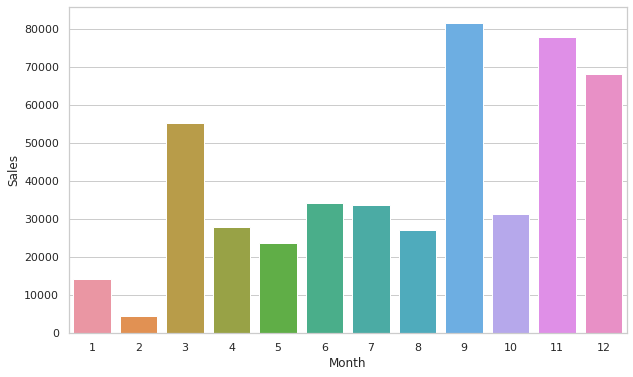

In [14]:
df2015=data2015.groupby('Month')['Sales'].sum()
df2015month=df2015.reset_index()
df2015month.set_index("Month")
#Vizuallaşdırma kodları
plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
sns.barplot(x="Month",y="Sales",data=df2015month)
plt.title=("2015 ci il üzrə aylıq satış")
plt.show()

### 2016 ci il üzrə aylıq satış

In [15]:
data2016.groupby("Month")['Sales'].sum()

Month
1     18066.9576
2     11951.4110
3     32339.3184
4     34154.4685
5     29959.5305
6     23599.3740
7     28608.2590
8     36818.3422
9     63133.6060
10    31011.7375
11    75249.3995
12    74543.6012
Name: Sales, dtype: float64

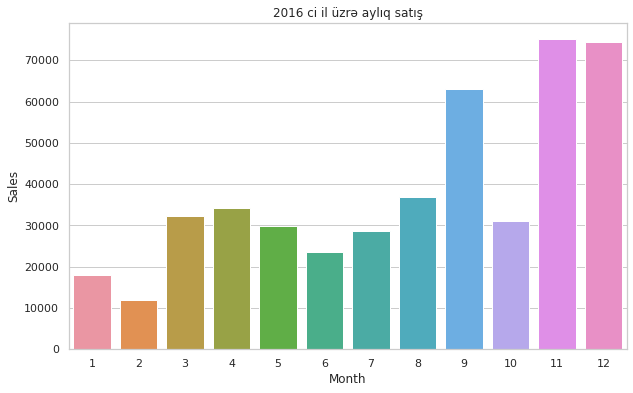

In [16]:
df2016=data2016.groupby("Month")['Sales'].sum()
df2016month=df2016.reset_index()
df2016month.set_index("Month")
### Vizuallaşdırma kodları
plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
sns.barplot(x="Month",y="Sales",data=df2016month).set(title="2016 ci il üzrə aylıq satış")
plt.show()

### 2017 ci il üzrə aylıq satış

In [17]:
data2017.groupby("Month")["Sales"].sum()

Month
1     18542.4910
2     22978.8150
3     51165.0590
4     38679.7670
5     56656.9080
6     39724.4860
7     38320.7830
8     30542.2003
9     69193.3909
10    59583.0330
11    79066.4958
12    95739.1210
Name: Sales, dtype: float64

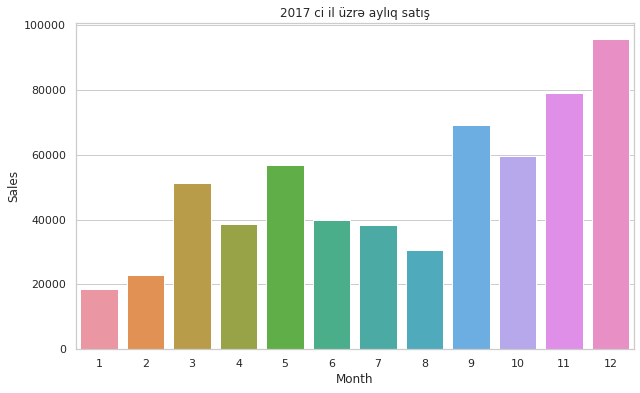

In [18]:
df2017=data2017.groupby("Month")["Sales"].sum()
df2017month=df2017.reset_index()
df2017month.set_index("Month")
### Vizuallaşdırma kodları
plt.figure(figsize=(10,6))
sns.barplot(x="Month",y="Sales",data=df2017month).set(title="2017 ci il üzrə aylıq satış")
plt.show() 

### 2018 ci il üzrə aylıq satış

In [19]:
data2018.groupby("Month")["Sales"].sum()

Month
1      43476.4740
2      19920.9974
3      58863.4128
4      35541.9101
5      43825.9822
6      48190.7277
7      44825.1040
8      62837.8480
9      86152.8880
10     77448.1312
11    117938.1550
12     83030.3888
Name: Sales, dtype: float64

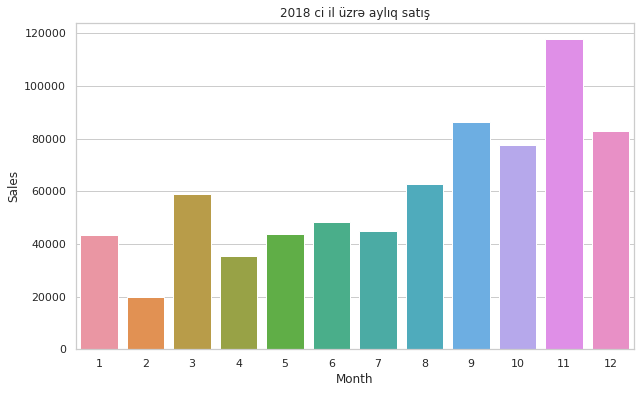

In [20]:
df2018=data2018.groupby("Month")["Sales"].sum()
df2018month=df2018.reset_index()
df2018month.set_index("Month")
### Vizuallaşdırma kodları
plt.figure(figsize=(10,6))
sns.barplot(x="Month",y="Sales",data=df2018month).set(title="2018 ci il üzrə aylıq satış")
plt.show() 

### Ən çox satış edən 10 State

In [21]:
data.groupby("State")["Sales"].sum().sort_values(ascending=False).head(10)

State
California      446306.4635
New York        306361.1470
Texas           168572.5322
Washington      135206.8500
Pennsylvania    116276.6500
Florida          88436.5320
Illinois         79236.5170
Michigan         76136.0740
Ohio             75130.3500
Virginia         70636.7200
Name: Sales, dtype: float64

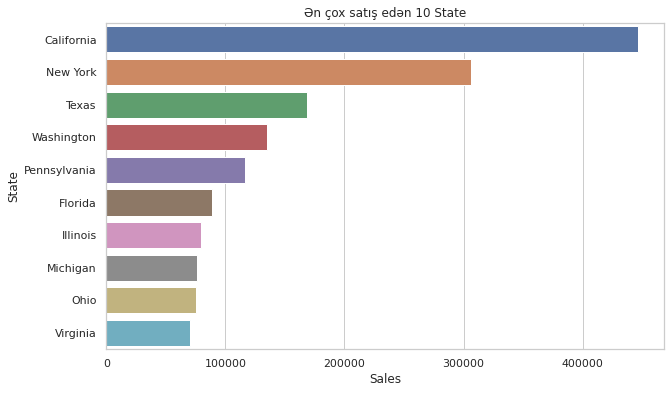

In [22]:
datastate=data.groupby("State")["Sales"].sum().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(y="State",x="Sales",data=datastate).set(title="Ən çox satış edən 10 State")
sns.set_theme(style="whitegrid")
plt.show()

### Ən çox satış edən 10 City

In [23]:
data.groupby("City")['Sales'].sum().sort_values(ascending=False).head(10) 

City
New York City    252462.5470
Los Angeles      173420.1810
Seattle          116106.3220
San Francisco    109041.1200
Philadelphia     108841.7490
Houston           63956.1428
Chicago           47820.1330
San Diego         47521.0290
Jacksonville      44713.1830
Detroit           42446.9440
Name: Sales, dtype: float64

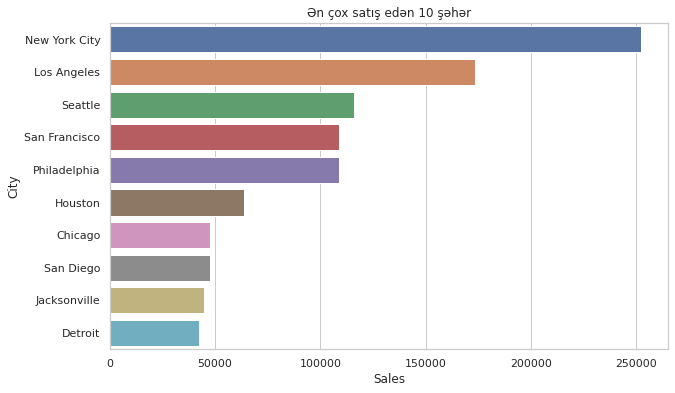

In [24]:
datacity=data.groupby("City")['Sales'].sum().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x="Sales",y="City",data=datacity).set(title="Ən çox satış edən 10 şəhər")
plt.show()

### Category üzrə satış

In [25]:
data.groupby("Category")['Sales'].sum().sort_values(ascending=False)

Category
Technology         827455.8730
Furniture          728658.5757
Office Supplies    705422.3340
Name: Sales, dtype: float64

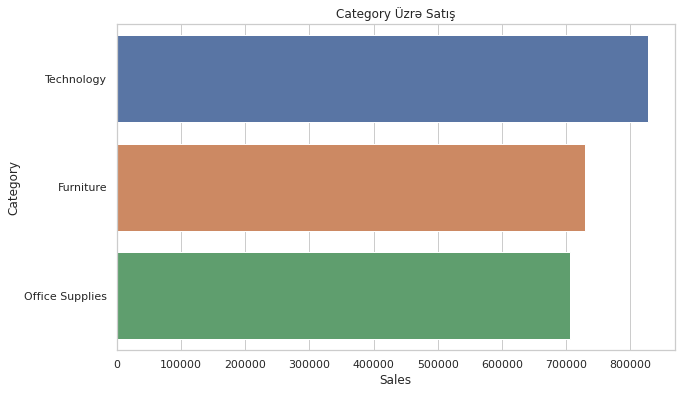

In [26]:
datacategory=data.groupby("Category")['Sales'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x="Sales",y="Category",data=datacategory).set(title="Category Üzrə Satış")
plt.show()

### Sub-Category üzrə ən çox satan 10 məhsul

In [27]:
data.groupby("Sub-Category")['Sales'].sum().sort_values(ascending=False).reset_index().head(10)

,Sub-Category,Sales
0,Phones,327782.4480
1,Chairs,322822.7310
2,Storage,219343.3920
3,Tables,202810.6280
4,Binders,200028.7850
5,Machines,189238.6310
6,Accessories,164186.7000
7,Copiers,146248.0940
8,Bookcases,113813.1987
9,Appliances,104618.4030


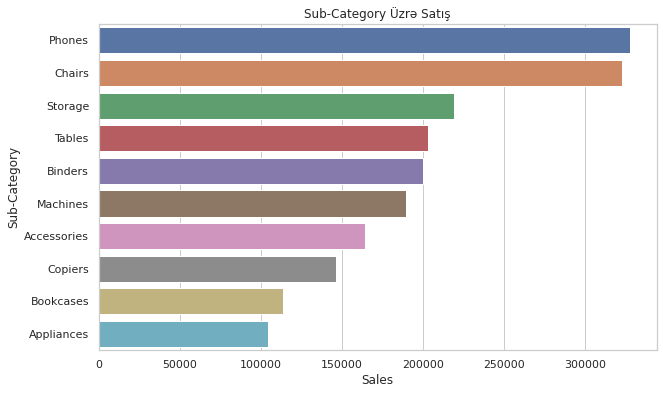

In [28]:
datasub=data.groupby("Sub-Category")['Sales'].sum().sort_values(ascending=False).reset_index().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x="Sales",y="Sub-Category",data=datasub).set(title="Sub-Category Üzrə Satış")
plt.show()

### State City üzrə satış

In [29]:
data.groupby(["State","City"])["Sales"].sum().sort_values(ascending=False)

State         City         
New York      New York City    252462.547
California    Los Angeles      173420.181
Washington    Seattle          116106.322
California    San Francisco    109041.120
Pennsylvania  Philadelphia     108841.749
                                  ...    
Florida       Ormond Beach          2.808
              Pensacola             2.214
              Jupiter               2.064
Ohio          Elyria                1.824
Texas         Abilene               1.392
Name: Sales, Length: 600, dtype: float64

### Segment üzrə satış

In [30]:
data.groupby("Segment")["Sales"].sum().sort_values(ascending=False)

Segment
Consumer       1.148061e+06
Corporate      6.884941e+05
Home Office    4.249822e+05
Name: Sales, dtype: float64

[Text(0.5, 1.0, 'Segment Üzrə Satış')]

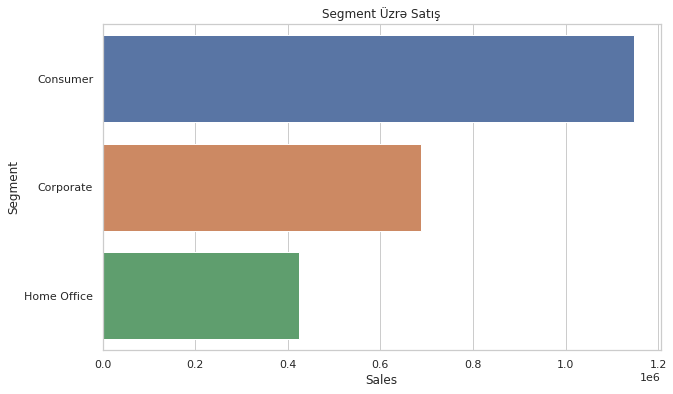

In [31]:
dataseg=data.groupby("Segment")["Sales"].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x="Sales",y="Segment",data=dataseg).set(title="Segment Üzrə Satış")

### Ən çox alış-veriş edən müştərilər

In [32]:
data.groupby("Customer Name")["Sales"].sum().sort_values(ascending=False).head(10).reset_index()

,Customer Name,Sales
0,Sean Miller,25043.050
1,Tamara Chand,19052.218
2,Raymond Buch,15117.339
3,Tom Ashbrook,14595.620
4,Adrian Barton,14473.571
5,Ken Lonsdale,14175.229
6,Sanjit Chand,14142.334
7,Hunter Lopez,12873.298
8,Sanjit Engle,12209.438
9,Christopher Conant,12129.072


[Text(0.5, 1.0, 'Customerlər Üzrə Satış')]

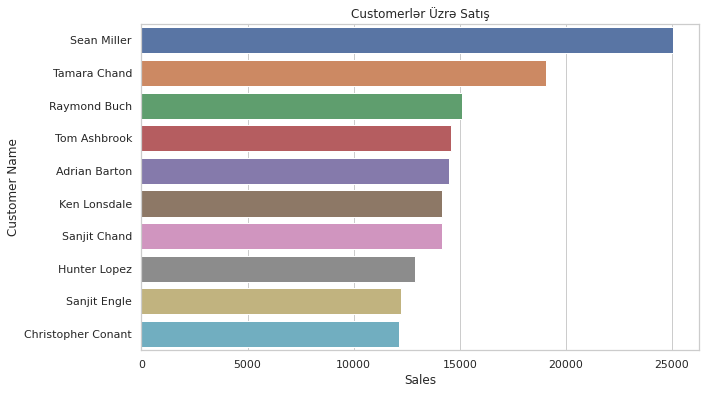

In [33]:
dataset=data.groupby("Customer Name")["Sales"].sum().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(10,6)) 
sns.barplot(x="Sales",y="Customer Name",data=dataset).set(title="Customerlər Üzrə Satış")

### Regiona görə satış

In [34]:
data.groupby("Region")["Sales"].sum().sort_values(ascending=False).reset_index

<bound method Series.reset_index of Region
West       710219.6845
East       669518.7260
Central    492646.9132
South      389151.4590
Name: Sales, dtype: float64>

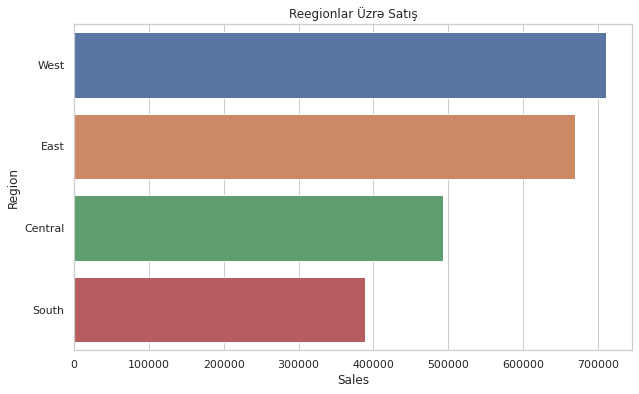

In [35]:
datareg=data.groupby("Region")["Sales"].sum().sort_values(ascending=False)
dataregion=datareg.reset_index()
dataregion.set_index("Region")
plt.figure(figsize=(10,6))
sns.barplot(x="Sales",y="Region",data=dataregion).set(title="Reegionlar Üzrə Satış")
plt.show()

### İllərə görə satış tendensiyası

In [36]:
# İlk öncə Year və Month sütunlarını birləşdirək
data["Year_Month"]=data["Year"].astype(str)+"-"+data["Month"].astype(str)

In [37]:
# Sütunlar birləşdi lakin formatları Date olaraq deyil object olaraq təyin edilir avtomatik
data.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Year               int64
Month              int64
Year_Month        object
dtype: object

In [38]:
### Year_month sütununu Date formatına çevirmək lazımdır
data["Year_Month"] = pd.to_datetime(data["Year_Month"]).dt.date

In [39]:
data.groupby("Year_Month")["Sales"].sum()

Year_Month
2015-01-01     14205.7070
2015-02-01      4519.8920
2015-03-01     55205.7970
2015-04-01     27906.8550
2015-05-01     23644.3030
2015-06-01     34322.9356
2015-07-01     33781.5430
2015-08-01     27117.5365
2015-09-01     81623.5268
2015-10-01     31453.3930
2015-11-01     77907.6607
2015-12-01     68167.0585
2016-01-01     18066.9576
2016-02-01     11951.4110
2016-03-01     32339.3184
2016-04-01     34154.4685
2016-05-01     29959.5305
2016-06-01     23599.3740
2016-07-01     28608.2590
2016-08-01     36818.3422
2016-09-01     63133.6060
2016-10-01     31011.7375
2016-11-01     75249.3995
2016-12-01     74543.6012
2017-01-01     18542.4910
2017-02-01     22978.8150
2017-03-01     51165.0590
2017-04-01     38679.7670
2017-05-01     56656.9080
2017-06-01     39724.4860
2017-07-01     38320.7830
2017-08-01     30542.2003
2017-09-01     69193.3909
2017-10-01     59583.0330
2017-11-01     79066.4958
2017-12-01     95739.1210
2018-01-01     43476.4740
2018-02-01     19920.9974
2

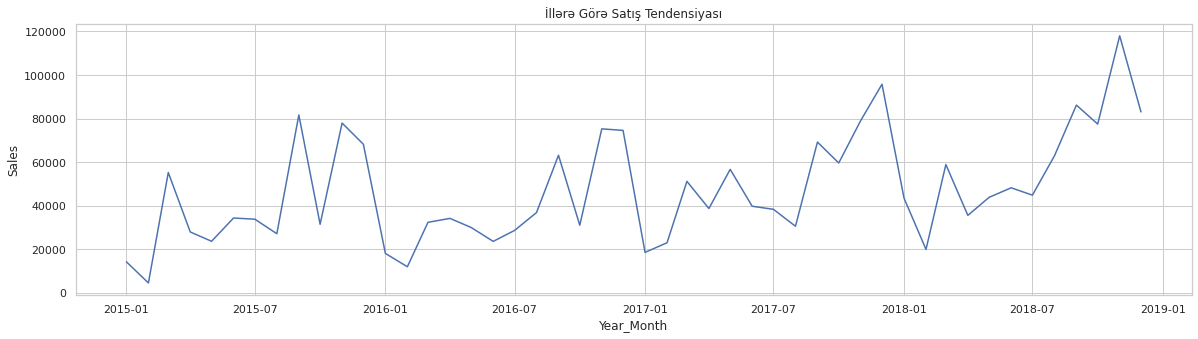

In [40]:
datatend=data.groupby("Year_Month")["Sales"].sum()
plt.figure(figsize=(20,5))
sns.lineplot(data=datatend).set(title="İllərə Görə Satış Tendensiyası")
plt.ylabel=("Sales")

### Category üzrə illərə görə satış tendensiyası

In [41]:
data["Category"].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

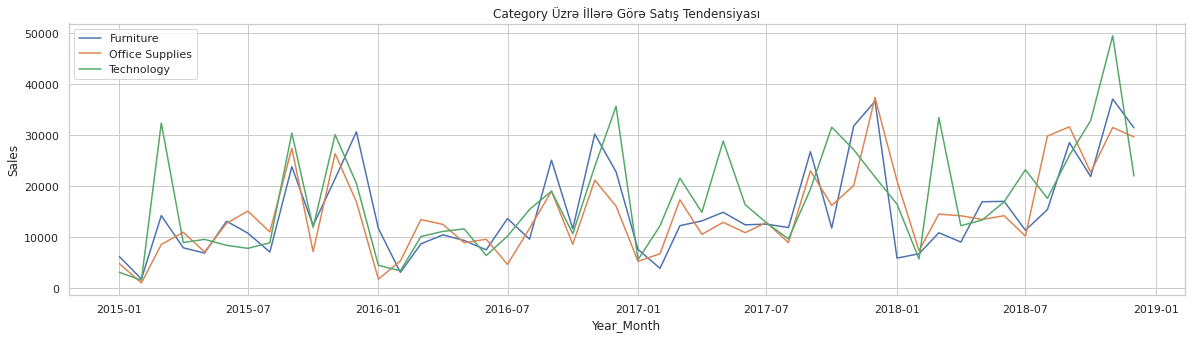

In [42]:
plt.figure(figsize=(20,5))
sns.lineplot(data=data[data.Category=="Furniture"].groupby("Year_Month")["Sales"].sum(),label="Furniture").set(title="Category Üzrə İllərə Görə Satış Tendensiyası")
sns.lineplot(data=data[data.Category=="Office Supplies"].groupby("Year_Month")["Sales"].sum(),label="Office Supplies")
sns.lineplot(data=data[data.Category=="Technology"].groupby("Year_Month")["Sales"].sum(),label="Technology")
plt.show()